In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling and Encoding libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler


#Modeling libraries (for imputation of missing values)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("C:/Users/saumy/OneDrive/Desktop/DF.csv")

In [3]:
df

,DATE,CSUSHPISA,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,01-01-2003,128.461,11174.129,289412,5.9160,5.8,2.181390,82.4,863855,14908,43320
1,01-02-2003,129.355,11174.129,289606,5.8425,5.9,1.975830,79.9,859225,14908,43320
2,01-03-2003,130.148,11174.129,289809,5.7450,5.9,1.126212,77.6,851132,14908,43320
3,01-04-2003,130.884,11312.766,290024,5.8125,6.0,0.553037,86.0,859459,15244,43320
4,01-05-2003,131.735,11312.766,290250,5.4840,6.1,1.075788,92.1,866814,15244,43320
...,...,...,...,...,...,...,...,...,...,...,...
236,01-09-2022,299.353,25994.639,333976,6.1120,3.5,8.382964,58.6,1836930,15340,74580
237,01-10-2022,298.873,26408.405,334141,6.9000,3.7,6.507748,59.9,1830477,14593,74580
238,01-11-2022,298.269,26408.405,334287,6.8050,3.6,5.765770,56.7,1842206,14593,74580
239,01-12-2022,297.413,26408.405,334420,6.3640,3.5,7.049161,59.8,1840896,14593,74580


Data Preparations Points:-

•	By using excel, we have cleaned the data and converted into more meaningful data. We have replace any missing values with similar values as some of our data was quarterly or yearly. 

•	The S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA):- This is our target variable. The index is designed to measure changes in the total value of all existing single-family housing stock in the United States over time. It tracks the price movement of residential real estate by analysing data on repeat sales of single-family homes. The S&P/Case-Shiller Home Price Indices are typically released on a monthly basis, with a time lag of about two months. This lag is necessary to ensure that the most accurate and comprehensive data are included in the calculations.

•	Monthly GDP: - The United States releases an advance estimate of GDP for each quarter, which is typically released about a month after the end of the quarter. The relationship between monthly GDP (Gross Domestic Product) and the U.S. Home Price Index is complex and multifaceted. Various economic factors can influence both GDP and home prices, and the relationship between them is often indirect.

•	Population(POPTHM): - Population dynamics can have a significant impact on the U.S. Home Price Index. The relationship between population and home prices is complex and multifaceted, and several factors come into play: Demand for Housing, Geographic Variations, Migration patterns, Economic Growth

•	Mortgage Rates 30 years(MORTGAGE30US): - Mortgage rates can have a substantial impact on the U.S. Home Price Index. The relationship between mortgage rates and home prices is complex, and changes in mortgage rates can influence both the demand for homes and the affordability of homeownership.

•	Unemployment Rate(UNRATE): - The unemployment rate can indeed influence the U.S. Home Price Index. The relationship between unemployment and home prices is complex and multifaceted, and several factors come into play: Income, Consumer confidence

•	Inflation Rate(MEDCPIM158SFRBCLE): - The inflation rate can influence the U.S. Home Price Index in several ways, and the relationship between inflation and home prices is complex. Some of the key ways in which inflation can impact the housing market: Interest Rates, Cost of construction, Regional variations, Consumer Behaviour

•	Consumer Sentiment(UMCSENT): - Consumer sentiment, which reflects the confidence and optimism of consumers about the state of the economy, can influence the U.S. Home Price Index in several ways. Some key ways in which consumer sentiment can impact the housing market: Consumer confidence, Mortgage rates, Market Stability

•	Construction Spending(TTLCONS): - It's important to note that while construction spending is a significant factor, it is one of many elements influencing the U.S. Home Price Index. Some ways affecting Construction spending are: Supply and Demand dynamics, Impact on local markets, Infrastructure development

•	Housing Estimates Vacant(EVACANTUSQ176N): - The presence of vacant homes in the housing market can influence the U.S. Home Price Index in several ways. The impact of vacant homes on home prices is often associated with broader market dynamics, supply and demand factors, and economic conditions

•	Median Household Income(MEHOINUSA646N): - The relationship between median household income and home prices to gauge the overall health and sustainability of the housing market. Affordability measures, such as the ratio of median home prices to median incomes, are commonly used to assess whether housing markets are within reach for the majority of potential buyers. Monitoring these factors helps provide insights into the dynamics of the housing market and the potential for future home price trends.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               241 non-null    object 
 1   CSUSHPISA          241 non-null    float64
 2   Monthly GDP        241 non-null    float64
 3   POPTHM             241 non-null    int64  
 4   MORTGAGE30US       241 non-null    float64
 5   UNRATE             241 non-null    float64
 6   MEDCPIM158SFRBCLE  241 non-null    float64
 7   UMCSENT            241 non-null    float64
 8   TTLCONS            241 non-null    int64  
 9   EVACANTUSQ176N     241 non-null    int64  
 10  MEHOINUSA646N      241 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 20.8+ KB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               241 non-null    datetime64[ns]
 1   CSUSHPISA          241 non-null    float64       
 2   Monthly GDP        241 non-null    float64       
 3   POPTHM             241 non-null    int64         
 4   MORTGAGE30US       241 non-null    float64       
 5   UNRATE             241 non-null    float64       
 6   MEDCPIM158SFRBCLE  241 non-null    float64       
 7   UMCSENT            241 non-null    float64       
 8   TTLCONS            241 non-null    int64         
 9   EVACANTUSQ176N     241 non-null    int64         
 10  MEHOINUSA646N      241 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 20.8 KB


When working with date time data, we have to convert and object data type to date time data type

#  Exploratory Data Analysis (EDA)
Checking null values and plotting into a heatmap

DATE                 0
CSUSHPISA            0
Monthly GDP          0
POPTHM               0
MORTGAGE30US         0
UNRATE               0
MEDCPIM158SFRBCLE    0
UMCSENT              0
TTLCONS              0
EVACANTUSQ176N       0
MEHOINUSA646N        0
dtype: int64


<Axes: >

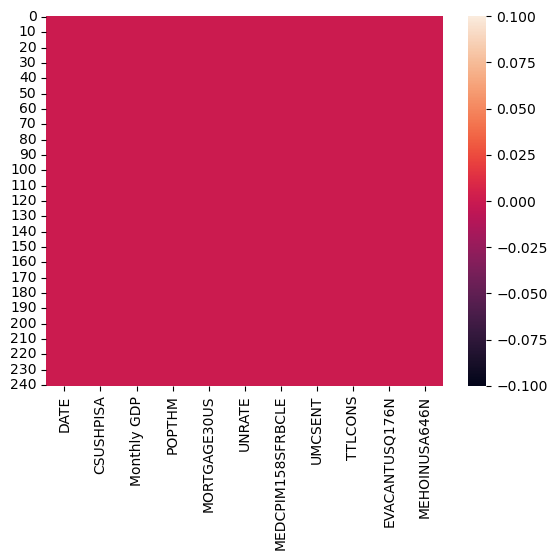

In [7]:
print(df.isna().sum())

sns.heatmap(df.isna())

As we can see, there are no null values present in the data

In [8]:
df.describe()

,DATE,CSUSHPISA,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
count,241,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,241.000000
mean,2012-12-30 22:18:25.394190848,181.140112,17299.298378,314899.796680,4.689902,6.001245,2.663434,82.296266,1.154462e+06,17115.709544,55680.746888
min,2003-01-01 00:00:00,128.461000,11174.129000,289412.000000,2.684000,3.400000,-0.286064,50.000000,7.583760e+05,13876.000000,43320.000000
25%,2008-01-01 00:00:00,148.134000,14448.882000,303280.000000,3.802500,4.500000,1.947530,73.200000,9.257320e+05,15883.000000,49780.000000
50%,2013-01-01 00:00:00,172.860000,16648.189000,316038.000000,4.457500,5.400000,2.420296,84.100000,1.121749e+06,17268.000000,53590.000000
75%,2018-01-01 00:00:00,198.315000,20037.088000,327969.000000,5.754000,7.300000,3.024512,93.200000,1.300694e+06,18219.000000,63180.000000
max,2023-01-01 00:00:00,304.724000,26813.601000,334533.000000,6.900000,14.700000,8.463917,103.800000,1.882753e+06,19137.000000,74580.000000
std,NaN,41.845072,3850.495599,13748.604179,1.113069,2.036837,1.442242,12.644193,2.832528e+05,1368.527167,9099.001288


Data Visualization

Univariate Analysis

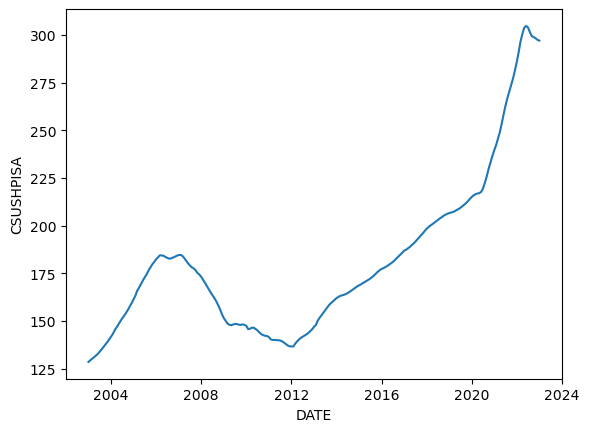

In [9]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df)

When conducting univariate analysis of date and the U.S. Home Price Index (HPI) using a line plot, we are essentially exploring the trend and patterns of home prices over time.  An upward trend indicates increasing home prices, while a downward trend indicates decreasing prices.

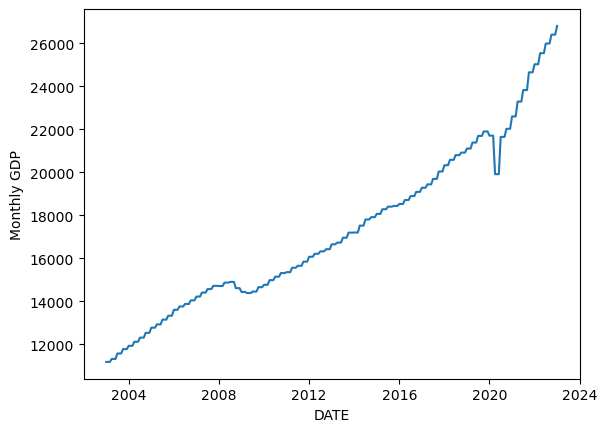

In [10]:
ax=sns.lineplot(x='DATE',y='Monthly GDP',data=df)


When conducting univariate analysis of date and monthly GDP using a line plot, we are exploring the trends and patterns in the economic performance of a country over time. Upward trends suggest expanding economic activity, while downward trends indicate economic contraction.

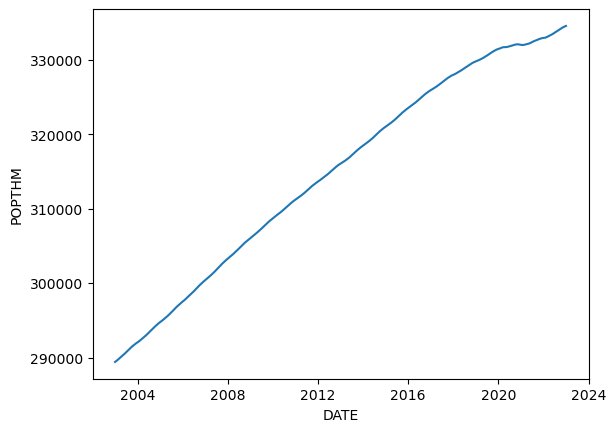

In [11]:
ax=sns.lineplot(x='DATE',y='POPTHM',data=df)

When conducting univariate analysis of date and population using a line plot, we are exploring the trends and patterns in population changes over time. An upward trend indicates population growth, while a downward trend suggests a declining population.

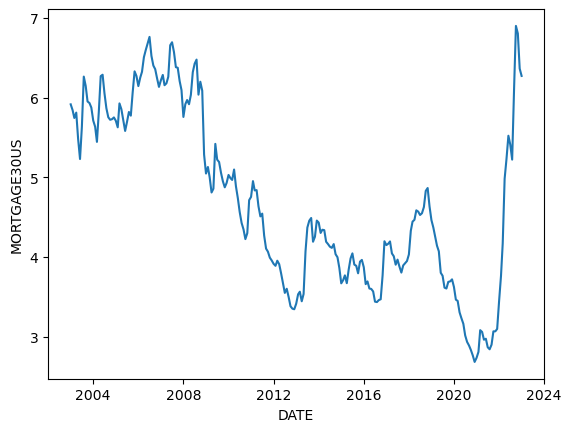

In [12]:
ax=sns.lineplot(x='DATE',y='MORTGAGE30US',data=df)

When conducting univariate analysis of date and 30-year mortgage rates using a line plot, we are exploring the trends and patterns in the interest rates for 30-year mortgages over time.A line plot allows to visually identify periods of changes in 30-year mortgage rates. This helps in understanding the overall trend of interest rates over time.

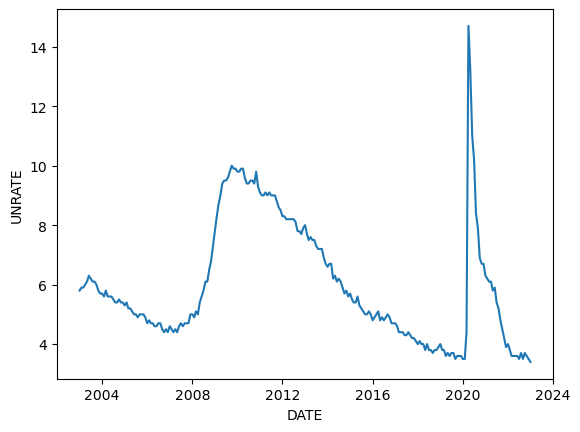

In [13]:
ax=sns.lineplot(x='DATE',y='UNRATE',data=df)

When conducting a univariate analysis of date and the unemployment rate using a line plot, we are exploring the trends and patterns in the labor market over time. A line plot helps in identifying cyclical patterns in the unemployment rate. Economic cycles often manifest in periods of low unemployment (economic expansion) and high unemployment (economic contraction).

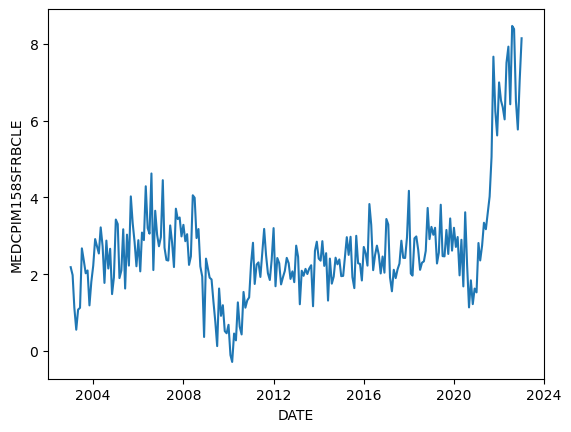

In [14]:
ax=sns.lineplot(x='DATE',y='MEDCPIM158SFRBCLE',data=df)

When conducting a univariate analysis of date and inflation rate using a line plot, we are exploring the trends and patterns in the general level of prices over time. A line plot helps identify periods of inflation and deflation. Upward trends in the line indicate inflationary pressures, while downward trends suggest deflationary tendencies.

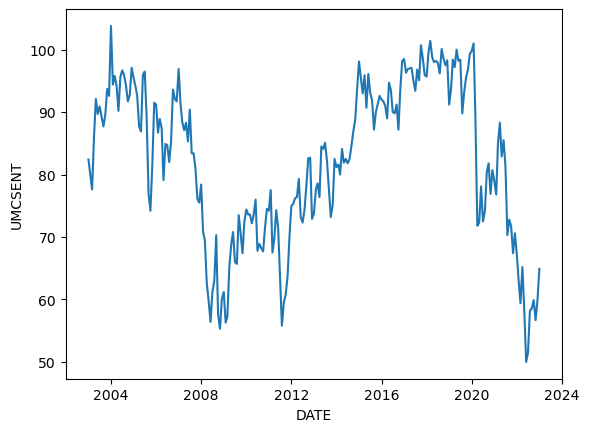

In [15]:
ax=sns.lineplot(x='DATE',y='UMCSENT',data=df)

When conducting a univariate analysis of date and customer sentiment using a line plot, we are exploring the trends and patterns in the sentiment expressed by customers over time. The line plot helps identify the overall trend in customer sentiment over time. Upward trends may indicate improving sentiment, while downward trends may suggest a decline in sentiment.

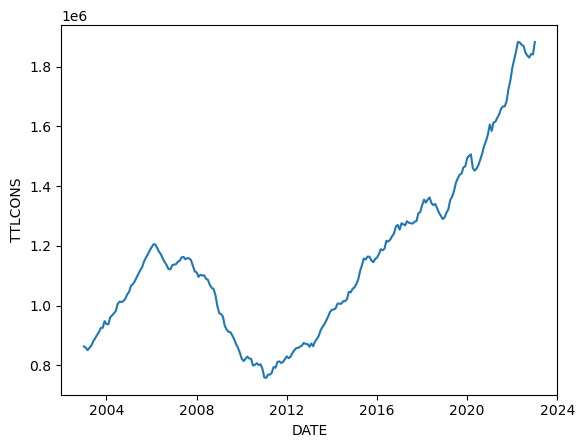

In [16]:
ax=sns.lineplot(x='DATE',y='TTLCONS',data=df)

When conducting a univariate analysis of date and construction spending using a line plot, we are exploring the trends and patterns in the amount spent on construction projects over time. The line plot helps identify the overall trend in construction spending over time. Upward trends may indicate increasing investment in construction projects, while downward trends may suggest a decline.

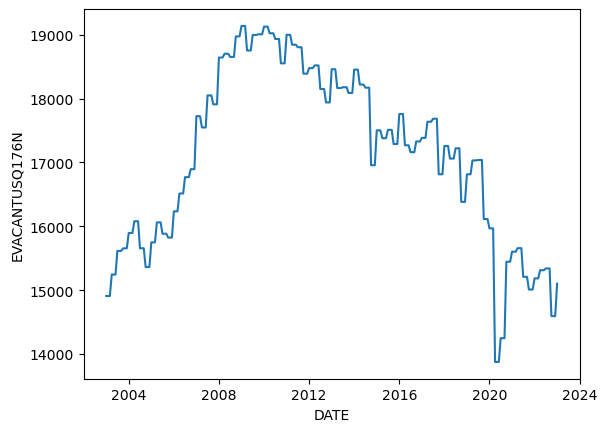

In [17]:
ax=sns.lineplot(x='DATE',y='EVACANTUSQ176N',data=df)


When conducting a univariate analysis of date and housing estimates for vacant properties using a line plot, we are exploring the trends and patterns in the number of vacant homes over time. The line plot helps identify the overall trend in housing vacancy over time. Upward trends may indicate an increasing number of vacant properties, while downward trends may suggest a decline in vacancy rates.

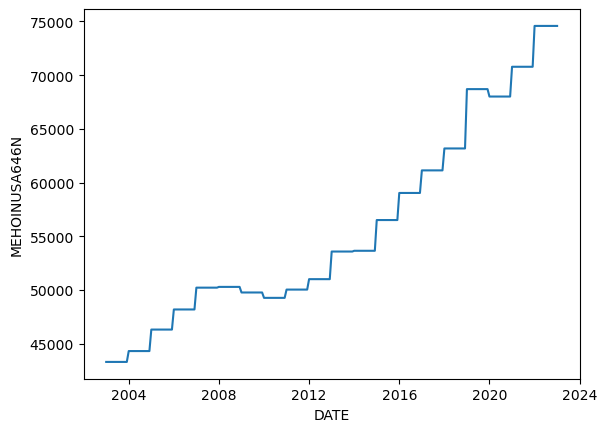

In [18]:
ax=sns.lineplot(x='DATE',y='MEHOINUSA646N',data=df)

When conducting a univariate analysis of date and median household income using a line plot, we are exploring the trends and patterns in the income levels of households over time.The line plot helps identify whether median household income is increasing, decreasing, or remaining relatively stable over time. Upward trends suggest income growth, while downward trends indicate a decline.

Multivariate Analysis

Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = df[['CSUSHPISA', 'Monthly GDP']].copy()
df_norm[['CSUSHPISA', 'Monthly GDP']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

We are using MinMaxScaler method for Normalization to scale the data into normal range

In [20]:
df_norm

,CSUSHPISA,Monthly GDP,DATE
0,0.000000,0.000000,2003-01-01
1,0.005072,0.000000,2003-02-01
2,0.009571,0.000000,2003-03-01
3,0.013747,0.008865,2003-04-01
4,0.018575,0.008865,2003-05-01
...,...,...,...
236,0.969528,0.947635,2022-09-01
237,0.966805,0.974091,2022-10-01
238,0.963379,0.974091,2022-11-01
239,0.958522,0.974091,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

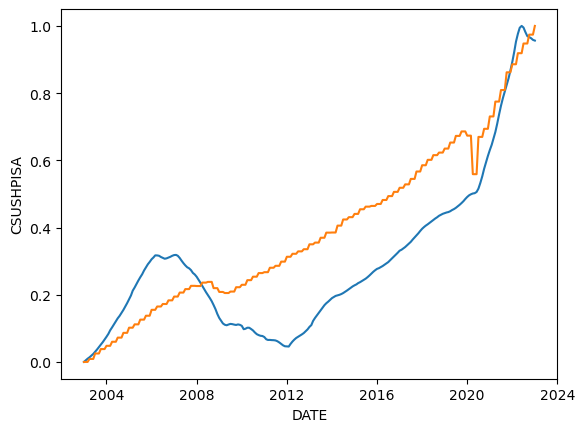

In [21]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='Monthly GDP',data=df_norm)

As we can see, with increase in Monthly GDP there is an increase Home Price Index as well.

In [22]:
df_norm = df[['CSUSHPISA', 'POPTHM']].copy()
df_norm[['CSUSHPISA', 'POPTHM']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [23]:
df_norm

,CSUSHPISA,POPTHM,DATE
0,0.000000,0.000000,2003-01-01
1,0.005072,0.004300,2003-02-01
2,0.009571,0.008799,2003-03-01
3,0.013747,0.013564,2003-04-01
4,0.018575,0.018572,2003-05-01
...,...,...,...
236,0.969528,0.987655,2022-09-01
237,0.966805,0.991312,2022-10-01
238,0.963379,0.994548,2022-11-01
239,0.958522,0.997496,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

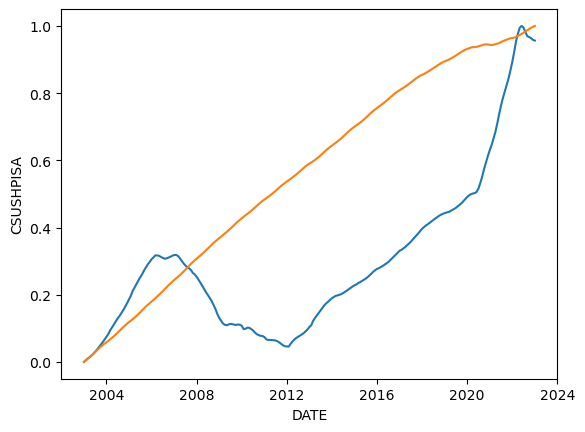

In [24]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='POPTHM',data=df_norm)

As we can see, with increase in pouplation, it does not affect Home Price index much, as we can we see decline is HPI in many years, with increase in population.

In [25]:
df_norm = df[['CSUSHPISA', 'MORTGAGE30US']].copy()
df_norm[['CSUSHPISA', 'MORTGAGE30US']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [26]:
df_norm

,CSUSHPISA,MORTGAGE30US,DATE
0,0.000000,0.766603,2003-01-01
1,0.005072,0.749170,2003-02-01
2,0.009571,0.726044,2003-03-01
3,0.013747,0.742054,2003-04-01
4,0.018575,0.664137,2003-05-01
...,...,...,...
236,0.969528,0.813093,2022-09-01
237,0.966805,1.000000,2022-10-01
238,0.963379,0.977467,2022-11-01
239,0.958522,0.872865,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

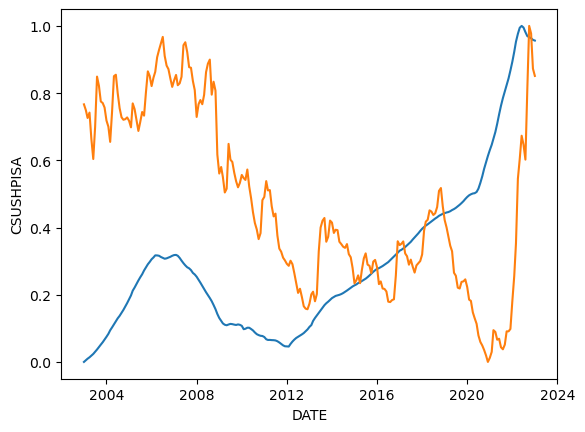

In [27]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='MORTGAGE30US',data=df_norm)

As we can see, with increase in mortgage rates there is an increase in Home Price Index as well.

In [28]:
df_norm = df[['CSUSHPISA', 'UNRATE']].copy()
df_norm[['CSUSHPISA', 'UNRATE']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [29]:
df_norm

,CSUSHPISA,UNRATE,DATE
0,0.000000,0.212389,2003-01-01
1,0.005072,0.221239,2003-02-01
2,0.009571,0.221239,2003-03-01
3,0.013747,0.230088,2003-04-01
4,0.018575,0.238938,2003-05-01
...,...,...,...
236,0.969528,0.008850,2022-09-01
237,0.966805,0.026549,2022-10-01
238,0.963379,0.017699,2022-11-01
239,0.958522,0.008850,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

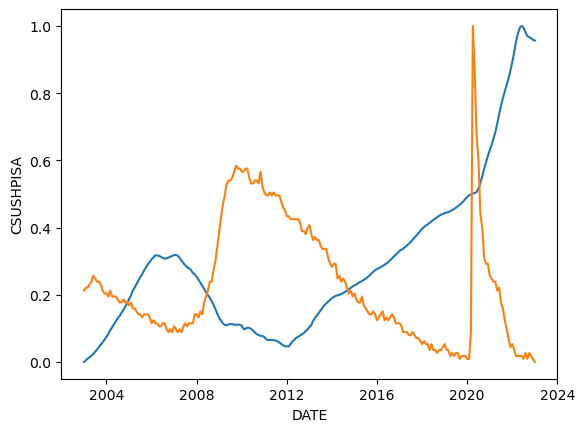

In [30]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='UNRATE',data=df_norm)

As we can see, if the unemployment rate is low, there is an increase in Home Price Index.

In [31]:
df_norm = df[['CSUSHPISA', 'MEDCPIM158SFRBCLE']].copy()
df_norm[['CSUSHPISA', 'MEDCPIM158SFRBCLE']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [32]:
df_norm

,CSUSHPISA,MEDCPIM158SFRBCLE,DATE
0,0.000000,0.281995,2003-01-01
1,0.005072,0.258503,2003-02-01
2,0.009571,0.161403,2003-03-01
3,0.013747,0.095897,2003-04-01
4,0.018575,0.155641,2003-05-01
...,...,...,...
236,0.969528,0.990748,2022-09-01
237,0.966805,0.776437,2022-10-01
238,0.963379,0.691640,2022-11-01
239,0.958522,0.838313,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

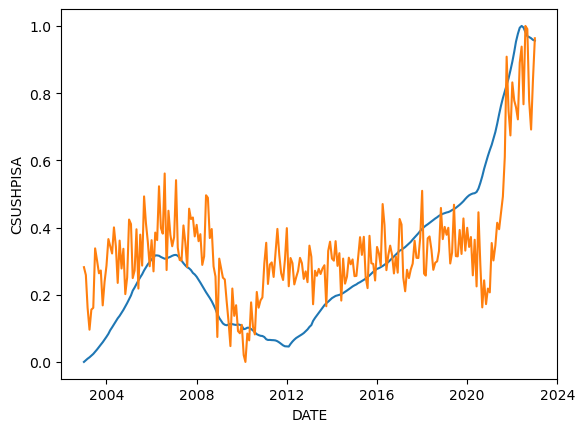

In [33]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='MEDCPIM158SFRBCLE',data=df_norm)

As we can see, if the inflation rate is high, there is an increase in Home Price Index as well.

In [34]:
df_norm = df[['CSUSHPISA', 'UMCSENT']].copy()
df_norm[['CSUSHPISA', 'UMCSENT']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [35]:
df_norm

,CSUSHPISA,UMCSENT,DATE
0,0.000000,0.602230,2003-01-01
1,0.005072,0.555762,2003-02-01
2,0.009571,0.513011,2003-03-01
3,0.013747,0.669145,2003-04-01
4,0.018575,0.782528,2003-05-01
...,...,...,...
236,0.969528,0.159851,2022-09-01
237,0.966805,0.184015,2022-10-01
238,0.963379,0.124535,2022-11-01
239,0.958522,0.182156,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

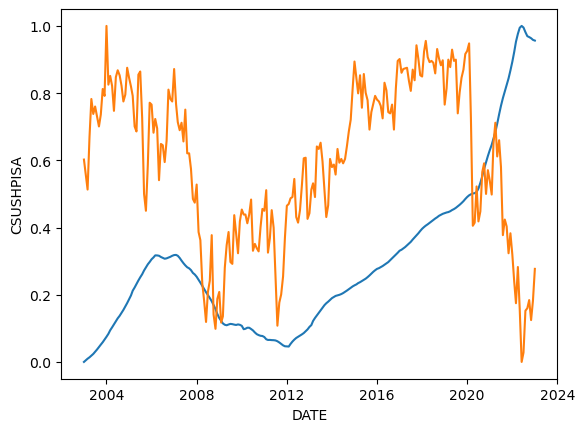

In [36]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='UMCSENT',data=df_norm)

As we can see before 2020, there was moderate linear relation between the Home Price Index and Consumer Sentiment. But after covid pandemic, the consumer sentiment and Home Price Index show strong negative linear relationship.

In [37]:
df_norm = df[['CSUSHPISA', 'TTLCONS']].copy()
df_norm[['CSUSHPISA', 'TTLCONS']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [38]:
df_norm

,CSUSHPISA,TTLCONS,DATE
0,0.000000,0.093811,2003-01-01
1,0.005072,0.089693,2003-02-01
2,0.009571,0.082495,2003-03-01
3,0.013747,0.089901,2003-04-01
4,0.018575,0.096443,2003-05-01
...,...,...,...
236,0.969528,0.959246,2022-09-01
237,0.966805,0.953507,2022-10-01
238,0.963379,0.963938,2022-11-01
239,0.958522,0.962773,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

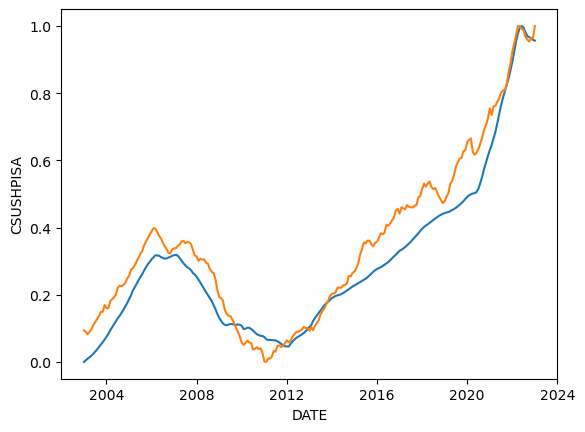

In [39]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='TTLCONS',data=df_norm)

As we can see, With increase in Construction spending, there is an increase in Home Price Index as well.

In [40]:
df_norm = df[['CSUSHPISA', 'EVACANTUSQ176N']].copy()
df_norm[['CSUSHPISA', 'EVACANTUSQ176N']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [41]:
df_norm

,CSUSHPISA,EVACANTUSQ176N,DATE
0,0.000000,0.196160,2003-01-01
1,0.005072,0.196160,2003-02-01
2,0.009571,0.196160,2003-03-01
3,0.013747,0.260027,2003-04-01
4,0.018575,0.260027,2003-05-01
...,...,...,...
236,0.969528,0.278274,2022-09-01
237,0.966805,0.136286,2022-10-01
238,0.963379,0.136286,2022-11-01
239,0.958522,0.136286,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

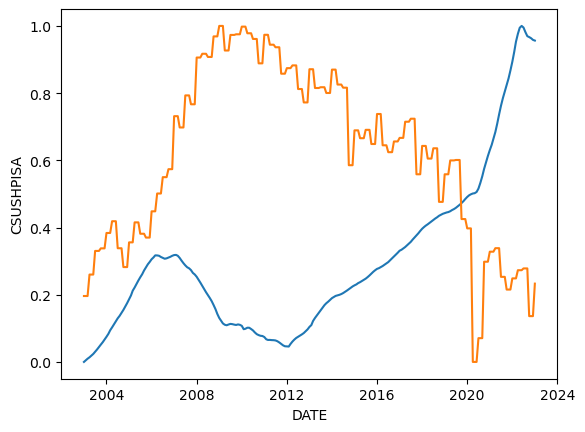

In [42]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='EVACANTUSQ176N',data=df_norm)

As we can see with increase in vacant homes, there is a decrease in Home price index. This shows that supply of houses are more.

In [43]:
df_norm = df[['CSUSHPISA', 'MEHOINUSA646N']].copy()
df_norm[['CSUSHPISA', 'MEHOINUSA646N']] = scaler.fit_transform(df_norm)
df_norm['DATE']=df['DATE']

In [44]:
df_norm

,CSUSHPISA,MEHOINUSA646N,DATE
0,0.000000,0.0,2003-01-01
1,0.005072,0.0,2003-02-01
2,0.009571,0.0,2003-03-01
3,0.013747,0.0,2003-04-01
4,0.018575,0.0,2003-05-01
...,...,...,...
236,0.969528,1.0,2022-09-01
237,0.966805,1.0,2022-10-01
238,0.963379,1.0,2022-11-01
239,0.958522,1.0,2022-12-01


<Axes: xlabel='DATE', ylabel='CSUSHPISA'>

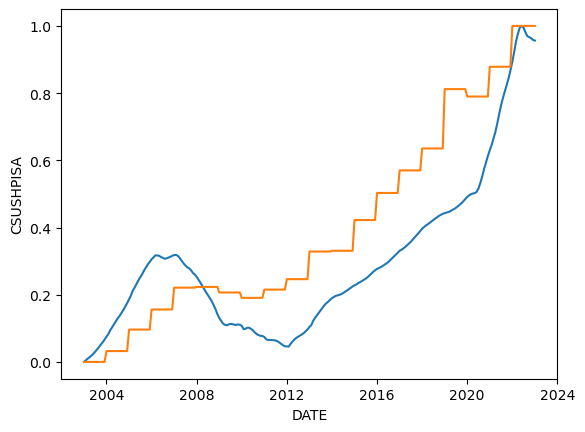

In [45]:
ax=sns.lineplot(x='DATE',y='CSUSHPISA',data=df_norm)
sns.lineplot(x='DATE',y='MEHOINUSA646N',data=df_norm)

As we can see with increase in Median Household Income, there is an increase in Home Price Index as well.

In [46]:
df.corr()

,DATE,CSUSHPISA,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
DATE,1.000000,0.746328,0.975251,0.994292,-0.702390,-0.215515,0.408600,-0.034268,0.727728,-0.223922,0.955966
CSUSHPISA,0.746328,1.000000,0.861563,0.680873,-0.197656,-0.510724,0.748379,-0.109275,0.978713,-0.595280,0.881818
Monthly GDP,0.975251,0.861563,1.000000,0.950202,-0.569454,-0.340746,0.560820,-0.078291,0.835284,-0.328806,0.982514
POPTHM,0.994292,0.680873,0.950202,1.000000,-0.733217,-0.184560,0.344342,-0.008848,0.665305,-0.141832,0.925990
MORTGAGE30US,-0.702390,-0.197656,-0.569454,-0.733217,1.000000,-0.190732,0.114280,-0.099308,-0.202898,-0.000846,-0.545983
UNRATE,-0.215515,-0.510724,-0.340746,-0.184560,-0.190732,1.000000,-0.526184,-0.469665,-0.582921,0.401146,-0.352545
MEDCPIM158SFRBCLE,0.408600,0.748379,0.560820,0.344342,0.114280,-0.526184,1.000000,-0.235573,0.703402,-0.451044,0.542405
UMCSENT,-0.034268,-0.109275,-0.078291,-0.008848,-0.099308,-0.469665,-0.235573,1.000000,0.011882,-0.227420,-0.035003
TTLCONS,0.727728,0.978713,0.835284,0.665305,-0.202898,-0.582921,0.703402,0.011882,1.000000,-0.651699,0.874687
EVACANTUSQ176N,-0.223922,-0.595280,-0.328806,-0.141832,-0.000846,0.401146,-0.451044,-0.227420,-0.651699,1.000000,-0.397973


<Axes: >

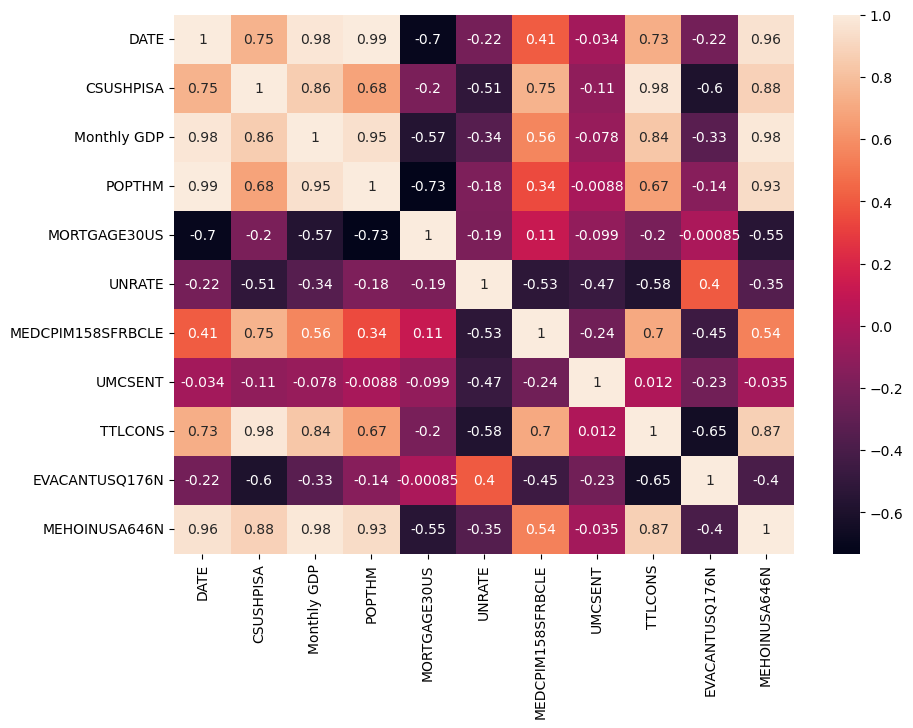

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

Observations:-
•	Population and Monthly GDP has very strong positive correlation (0.95).
•	Monthly GDP and Construction Spending has strong positive correlation (0.84).
•	Monthly GDP and Median Household Income has very strong positive correlation (0.98).
•	 Population and Median Household Income has very high positive correlation (0.93).
•	Construction Spending and Median Household Income has very strong positive correlation (0.87).
•	 Monthly GDP and Mortgage rate has moderate negative correlation9 (-0.57).
•	 Monthly GDP and Unemployment rate has negative correlation.(-0.34)
•	 Monthly GDP and Inflation rate has moderate positive correlation (0.56).
•	Population and Mortgage rate has strong negative correlation (-0.73).
•	Construction spending and Housing Estimates Vacant has negative correlation.(0.65)
•	The target variable (Home Price Index) has positive correlation with Monthly GDP, Population, Inflation rate, construction spending and Median Household Income.
•	The target variable (Home Price Index) has negative correlation with Mortgage Rate, Unemployment Rate, Customer Sentiment and Housing Estimates Vacant.


Checking for Outliers

<Figure size 1800x2000 with 0 Axes>

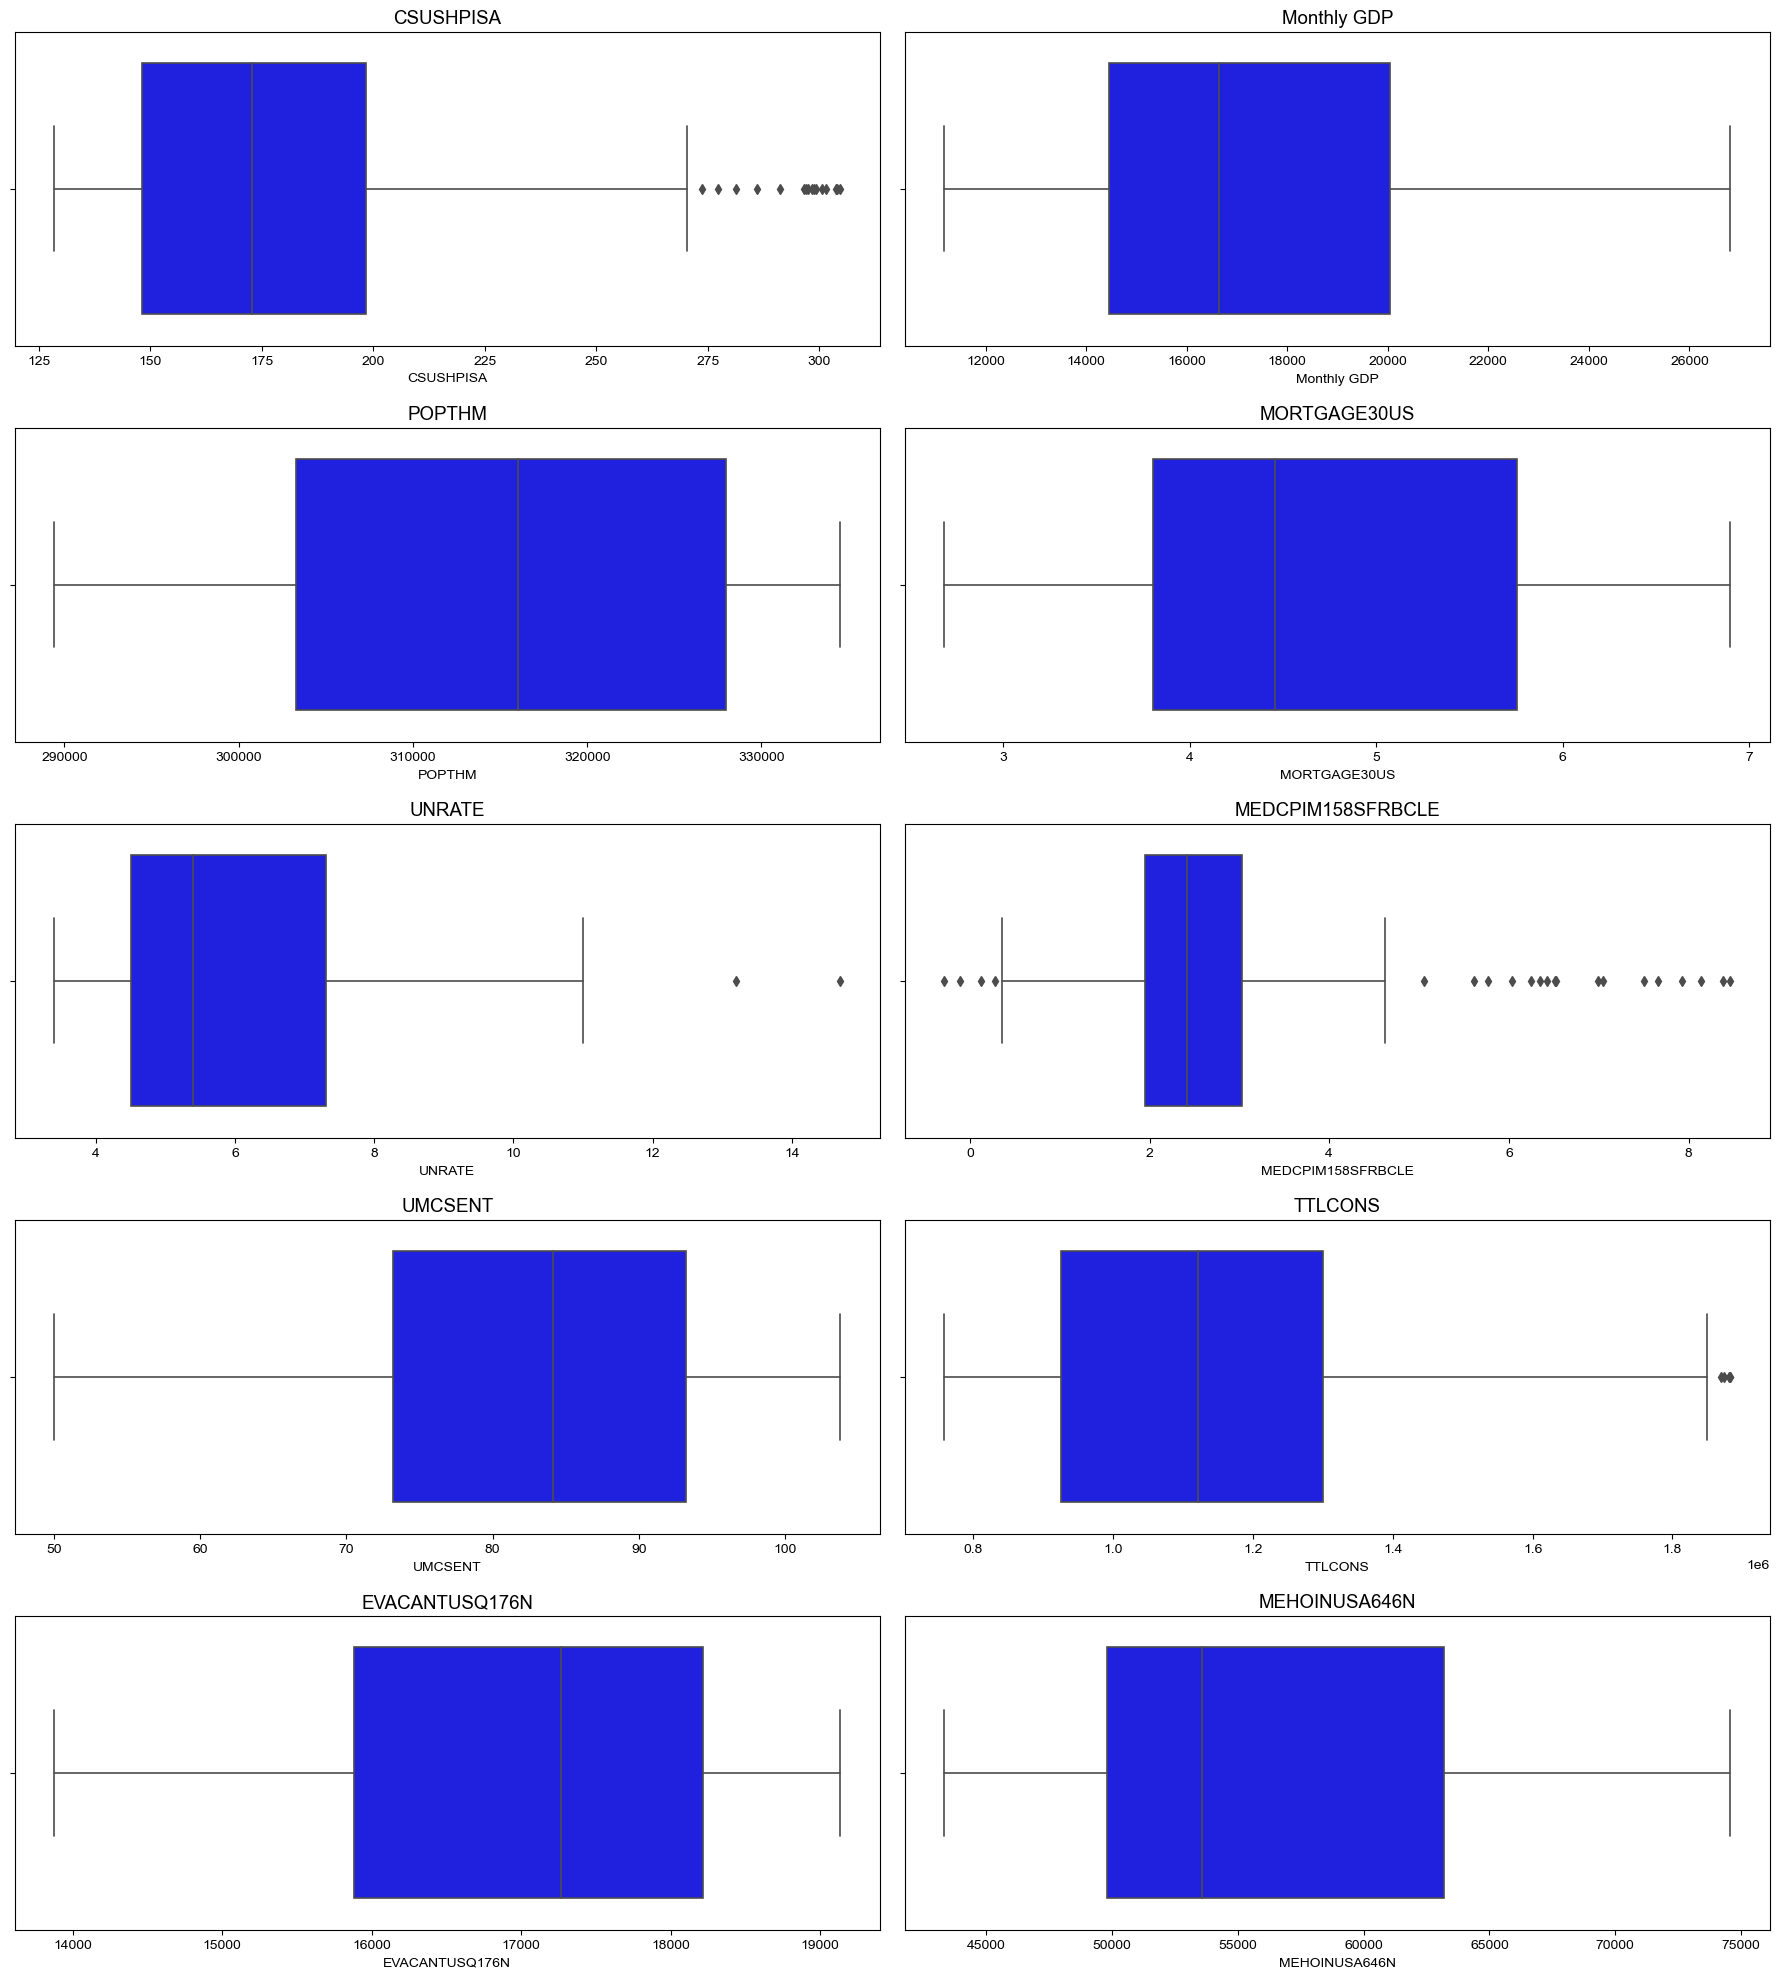

In [58]:
plt.figure(figsize=(18, 20))
rows = len(df.columns[1:]) // 2 
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(18, 20))
axes = axes.flatten()
for i, column in enumerate(df.columns[1:]):
    sns.set_style('darkgrid')
    sns.set_context('paper', font_scale=1.4)
    sns.boxplot(x=df[column], color='blue', ax=axes[i])
    axes[i].set_title(column)


plt.tight_layout()
plt.show()

After checking the outliers, we have outliers in Unemployment rate, Inflation Rate and Construction Spending. If we remove the outliers, the data loss is 1%.
The data loss is very minimum, hence we will remove outliers.

Checking Skewness

In [59]:
df1=df.drop('DATE',axis=1)

In [60]:
df1.skew()

CSUSHPISA            1.377650
Monthly GDP          0.541802
POPTHM              -0.244388
MORTGAGE30US         0.211318
UNRATE               1.040069
MEDCPIM158SFRBCLE    1.771119
UMCSENT             -0.456900
TTLCONS              0.855759
EVACANTUSQ176N      -0.311331
MEHOINUSA646N        0.655195
dtype: float64

In [95]:
from scipy import stats
from scipy.stats import zscore

#Using zscore method for outliers removal
zscore_threshold = 3

# Calculating z-scores
z_scores_unrate = stats.zscore(df['UNRATE'])
z_scores_inflation = stats.zscore(df['MEDCPIM158SFRBCLE'])
z_scores_spending = stats.zscore(df['TTLCONS'])

# Finding index of outliers
outlier_unrate = (z_scores_unrate > zscore_threshold) | (z_scores_unrate < -zscore_threshold)
outlier_inflation = (z_scores_inflation > zscore_threshold) | (z_scores_inflation < -zscore_threshold)
outlier_spending = (z_scores_spending > zscore_threshold) | (z_scores_spending < -zscore_threshold)

# Combining
combined_outlier_indices = outlier_unrate | outlier_inflation | outlier_spending

# Remove outliers from the DataFrame
no_outliers = df[~combined_outlier_indices]

no_outliers.reset_index(drop=True, inplace=True)

In [62]:
no_outliers

,DATE,CSUSHPISA,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,2003-01-01,128.461,11174.129,289412,5.9160,5.8,2.181390,82.4,863855,14908,43320
1,2003-02-01,129.355,11174.129,289606,5.8425,5.9,1.975830,79.9,859225,14908,43320
2,2003-03-01,130.148,11174.129,289809,5.7450,5.9,1.126212,77.6,851132,14908,43320
3,2003-04-01,130.884,11312.766,290024,5.8125,6.0,0.553037,86.0,859459,15244,43320
4,2003-05-01,131.735,11312.766,290250,5.4840,6.1,1.075788,92.1,866814,15244,43320
...,...,...,...,...,...,...,...,...,...,...,...
226,2022-03-01,296.445,25029.116,333056,4.1720,3.6,6.350249,59.4,1849637,15184,74580
227,2022-04-01,300.573,25544.273,333184,4.9825,3.6,6.030320,65.2,1882753,15312,74580
228,2022-07-01,303.879,25994.639,333624,5.4125,3.5,6.423611,51.5,1869262,15340,74580
229,2022-10-01,298.873,26408.405,334141,6.9000,3.7,6.507748,59.9,1830477,14593,74580


We have remove outliers using z-score method. After removal of outliers, we have 231 rows and 11 columns

In [63]:
df

,DATE,CSUSHPISA,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,2003-01-01,128.461,11174.129,289412,5.9160,5.8,2.181390,82.4,863855,14908,43320
1,2003-02-01,129.355,11174.129,289606,5.8425,5.9,1.975830,79.9,859225,14908,43320
2,2003-03-01,130.148,11174.129,289809,5.7450,5.9,1.126212,77.6,851132,14908,43320
3,2003-04-01,130.884,11312.766,290024,5.8125,6.0,0.553037,86.0,859459,15244,43320
4,2003-05-01,131.735,11312.766,290250,5.4840,6.1,1.075788,92.1,866814,15244,43320
...,...,...,...,...,...,...,...,...,...,...,...
236,2022-09-01,299.353,25994.639,333976,6.1120,3.5,8.382964,58.6,1836930,15340,74580
237,2022-10-01,298.873,26408.405,334141,6.9000,3.7,6.507748,59.9,1830477,14593,74580
238,2022-11-01,298.269,26408.405,334287,6.8050,3.6,5.765770,56.7,1842206,14593,74580
239,2022-12-01,297.413,26408.405,334420,6.3640,3.5,7.049161,59.8,1840896,14593,74580


In [64]:
df=no_outliers

Data Preparation

In [65]:
#Differentiating Features and Target columns
x=df.drop(['CSUSHPISA'],axis=1)
y=df['CSUSHPISA']

In [66]:
x

,DATE,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,2003-01-01,11174.129,289412,5.9160,5.8,2.181390,82.4,863855,14908,43320
1,2003-02-01,11174.129,289606,5.8425,5.9,1.975830,79.9,859225,14908,43320
2,2003-03-01,11174.129,289809,5.7450,5.9,1.126212,77.6,851132,14908,43320
3,2003-04-01,11312.766,290024,5.8125,6.0,0.553037,86.0,859459,15244,43320
4,2003-05-01,11312.766,290250,5.4840,6.1,1.075788,92.1,866814,15244,43320
...,...,...,...,...,...,...,...,...,...,...
226,2022-03-01,25029.116,333056,4.1720,3.6,6.350249,59.4,1849637,15184,74580
227,2022-04-01,25544.273,333184,4.9825,3.6,6.030320,65.2,1882753,15312,74580
228,2022-07-01,25994.639,333624,5.4125,3.5,6.423611,51.5,1869262,15340,74580
229,2022-10-01,26408.405,334141,6.9000,3.7,6.507748,59.9,1830477,14593,74580


In [67]:
x=x.drop(['DATE'],axis=1)

In [68]:
x #features

,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,11174.129,289412,5.9160,5.8,2.181390,82.4,863855,14908,43320
1,11174.129,289606,5.8425,5.9,1.975830,79.9,859225,14908,43320
2,11174.129,289809,5.7450,5.9,1.126212,77.6,851132,14908,43320
3,11312.766,290024,5.8125,6.0,0.553037,86.0,859459,15244,43320
4,11312.766,290250,5.4840,6.1,1.075788,92.1,866814,15244,43320
...,...,...,...,...,...,...,...,...,...
226,25029.116,333056,4.1720,3.6,6.350249,59.4,1849637,15184,74580
227,25544.273,333184,4.9825,3.6,6.030320,65.2,1882753,15312,74580
228,25994.639,333624,5.4125,3.5,6.423611,51.5,1869262,15340,74580
229,26408.405,334141,6.9000,3.7,6.507748,59.9,1830477,14593,74580


In [69]:
y #target variable

0      128.461
1      129.355
2      130.148
3      130.884
4      131.735
        ...   
226    296.445
227    300.573
228    303.879
229    298.873
230    298.269
Name: CSUSHPISA, Length: 231, dtype: float64

We have differentiated target variable and features into x and y respectively.

In [70]:
x.skew()

Monthly GDP          0.497932
POPTHM              -0.203059
MORTGAGE30US         0.234681
UNRATE               0.732259
MEDCPIM158SFRBCLE    1.029360
UMCSENT             -0.500649
TTLCONS              0.833469
EVACANTUSQ176N      -0.335904
MEHOINUSA646N        0.711534
dtype: float64

In [71]:
skewed_columns=['UNRATE','MEDCPIM158SFRBCLE','TTLCONS']

After checking the skeweness, we can assess Unemployment Rate, Inflation rate and construction spending has skewed data. So we will reduce the skewness using the Cuberoot transformation.

In [72]:
for i in skewed_columns:
    x[i]=np.cbrt(x[i])

In [73]:
x.skew()

Monthly GDP          0.497932
POPTHM              -0.203059
MORTGAGE30US         0.234681
UNRATE               0.466060
MEDCPIM158SFRBCLE   -3.159890
UMCSENT             -0.500649
TTLCONS              0.514444
EVACANTUSQ176N      -0.335904
MEHOINUSA646N        0.711534
dtype: float64

Now the skewness of the data is satisfactory.

In [75]:
x

,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,11174.129,289412,5.9160,1.796702,1.296914,82.4,95.238735,14908,43320
1,11174.129,289606,5.8425,1.806969,1.254825,79.9,95.068280,14908,43320
2,11174.129,289809,5.7450,1.806969,1.040415,77.6,94.768856,14908,43320
3,11312.766,290024,5.8125,1.817121,0.820826,86.0,95.076909,15244,43320
4,11312.766,290250,5.4840,1.827160,1.024650,92.1,95.347353,15244,43320
...,...,...,...,...,...,...,...,...,...
226,25029.116,333056,4.1720,1.532619,1.851812,59.4,122.752073,15184,74580
227,25544.273,333184,4.9825,1.532619,1.820176,65.2,123.480330,15312,74580
228,25994.639,333624,5.4125,1.518294,1.858916,51.5,123.184687,15340,74580
229,26408.405,334141,6.9000,1.546680,1.866997,59.9,122.326747,14593,74580


Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

We are using Standard Scaler for scaling

In [77]:
x_s=scaler.fit_transform(x)
x=pd.DataFrame(x_s,columns=x.columns)
x

,Monthly GDP,POPTHM,MORTGAGE30US,UNRATE,MEDCPIM158SFRBCLE,UMCSENT,TTLCONS,EVACANTUSQ176N,MEHOINUSA646N
0,-1.626579,-1.834726,1.116064,-0.014660,-0.061259,-0.059183,-1.088535,-1.761928,-1.365768
1,-1.626579,-1.820312,1.049366,0.041217,-0.218006,-0.264951,-1.110876,-1.761928,-1.365768
2,-1.626579,-1.805229,0.960890,0.041217,-1.016514,-0.454258,-1.150120,-1.761928,-1.365768
3,-1.587766,-1.789254,1.022143,0.096465,-1.834309,0.237123,-1.109744,-1.504966,-1.365768
4,-1.587766,-1.772462,0.724044,0.151103,-1.075227,0.739197,-1.074298,-1.504966,-1.365768
...,...,...,...,...,...,...,...,...,...
226,2.252327,1.408023,-0.466535,-1.451876,2.005300,-1.952249,2.517546,-1.550852,2.309693
227,2.396553,1.417534,0.268956,-1.451876,1.887481,-1.474867,2.612996,-1.452961,2.309693
228,2.522640,1.450226,0.659161,-1.529834,2.031756,-2.602476,2.574247,-1.431548,2.309693
229,2.638480,1.488639,2.008999,-1.375349,2.061851,-1.911096,2.461800,-2.002830,2.309693


In [96]:
x.skew()

Monthly GDP          0.497932
POPTHM              -0.203059
MORTGAGE30US         0.234681
UNRATE               0.466060
MEDCPIM158SFRBCLE   -3.159890
UMCSENT             -0.500649
TTLCONS              0.514444
EVACANTUSQ176N      -0.335904
MEHOINUSA646N        0.711534
dtype: float64

After scaling of data, we can see that skewness remains the same.

Modelling

We will determine the best performing model from the following:
 
1. Linear Regression
2. Random Forest Regressor
3. Adaboost Regressor
4. Gradient Boosting Regressor
5. Decsision Tree Regressor
6. KNN Regressor
7. Lasso Regressor
8. Ridge Regressor
9. Support Vector Regressor (SVR).

Model performance indicator metrics:

1. R2 Score (Test and Training): The R2 score indicates the proportion of the variance.Models with higher R2 scores are fiting the data better.

2. Mean Absolute Error (MAE): MAE is the average absloute difference between predicted and actual values (residuals). Lower values better the performance.

3. Mean Squared Error (MSE): MSE calculates the average of squarde differences b/w predicted and actual values. Like MAE, lower MSE values better  the performance.

4. Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It is easier to understand because it is in the same unit as the target variable.

5. Cross Validation Score and Mean: Cross-validation helps assess the model's performance on unseen data. Higher cross-validation scores generally indicate better generalization and less overfitting.

In [80]:
#Splitting dataset into training testing dataset, selecting testing dataset 20% of whole dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20) 

#definging a function

def model(m):
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    print('R2 Score: ',r2_score(y_test,pred))  #test r2_score of the model
    print('R2 Score on training data: ',r2_score(y_train,m.predict(x_train))) #train r2_score of the model
    
    print('MAE: ',mean_absolute_error(y_test,pred)) #MAE of model
    print('MSE: ',mean_squared_error(y_test,pred)) #MSE of model
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred))) #RMSE of model
    
    cscore=cross_val_score(m,x,y)  #To check overfitting
    print('Mean of Cross_validation_scorec: ',cscore.mean())
    print('Cross_validation_score: ',cscore)
    
    sns.regplot(x=pred,y=y_test) #Graphing representation of comparison of test values & predicited values

R2 Score:  0.973052844004914
R2 Score on training data:  0.9860960202128847
MAE:  4.394117610393539
MSE:  34.8677154389861
RMSE:  5.904889113182914
Mean of Cross_validation_scorec:  0.6969286940257884
Cross_validation_score:  [0.6451482  0.39762075 0.71064726 0.89951659 0.83171067]


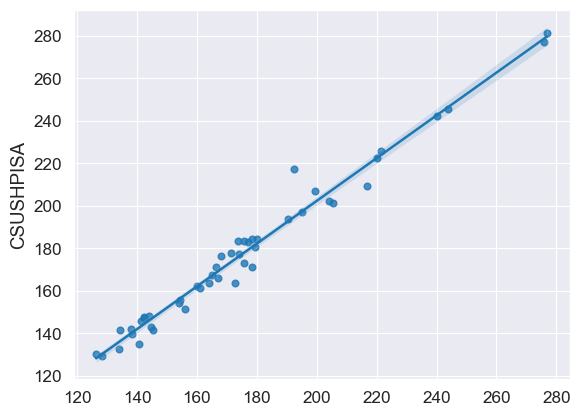

In [81]:
lr=LinearRegression()
model(lr)

R2 Score:  0.9974472049792058
R2 Score on training data:  0.9996013730419032
MAE:  1.3048799999999632
MSE:  3.3031363449020152
RMSE:  1.8174532579689677
Mean of Cross_validation_scorec:  0.04034514037695223
Cross_validation_score:  [ 0.18058401  0.91220538  0.39126341  0.17668938 -1.45901649]


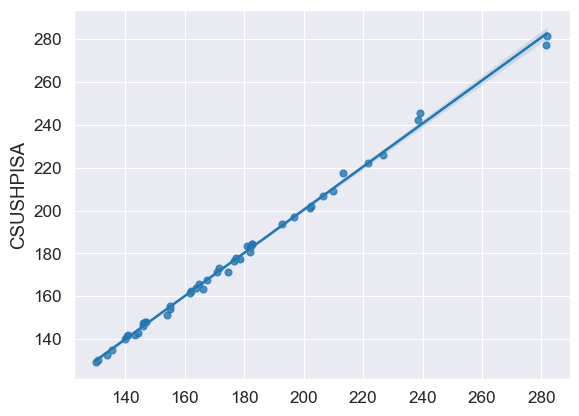

In [82]:
rfr=RandomForestRegressor()
model(rfr)

R2 Score:  0.9863701588118335
R2 Score on training data:  0.991795358558664
MAE:  3.4091880774529373
MSE:  17.636051244673926
RMSE:  4.199529883769602
Mean of Cross_validation_scorec:  -0.03529169851926994
Cross_validation_score:  [ 0.04705476  0.92184649  0.24035958  0.22821959 -1.61393891]


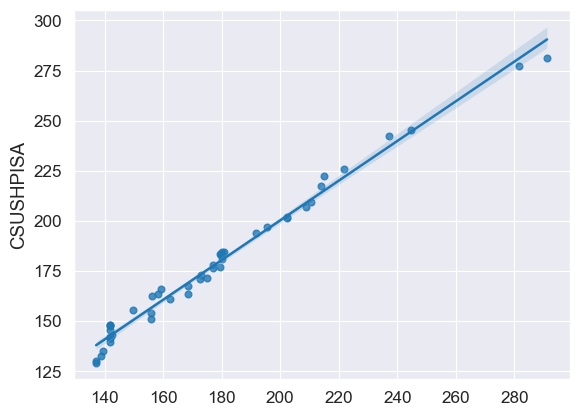

In [83]:
adr=AdaBoostRegressor()
model(adr)

R2 Score:  0.9951838213286274
R2 Score on training data:  0.9997440248360905
MAE:  1.6472437653647762
MSE:  6.2317948301244765
RMSE:  2.496356310730597
Mean of Cross_validation_scorec:  0.022395447707091565
Cross_validation_score:  [-0.04994318  0.88312709  0.59495482  0.25689784 -1.57305934]


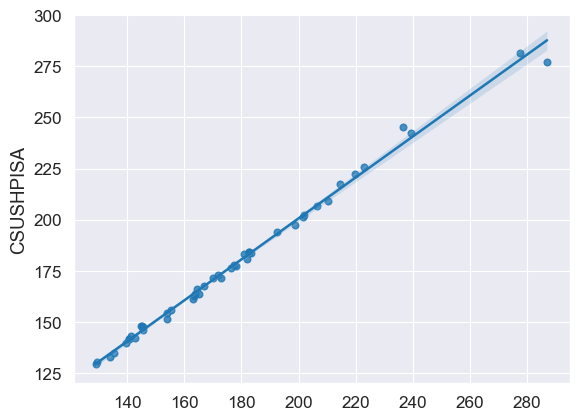

In [84]:
gbr=GradientBoostingRegressor()
model(gbr)

R2 Score:  0.9906667456453869
R2 Score on training data:  1.0
MAE:  2.184425531914895
MSE:  12.076571531914936
RMSE:  3.475136188973741
Mean of Cross_validation_scorec:  -0.30897903699895585
Cross_validation_score:  [ 0.05575394  0.89477567  0.31409595 -1.17797099 -1.63154976]


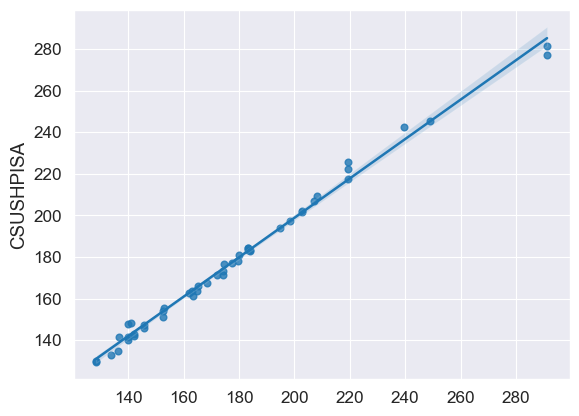

In [85]:
dtr=DecisionTreeRegressor()
model(dtr)

R2 Score:  0.9870620756688627
R2 Score on training data:  0.9943537908325563
MAE:  2.8100765957446785
MSE:  16.740759731063797
RMSE:  4.091547351682954
Mean of Cross_validation_scorec:  -0.5335543243256748
Cross_validation_score:  [-1.48017021  0.70611377  0.03276694 -0.23065222 -1.6958299 ]


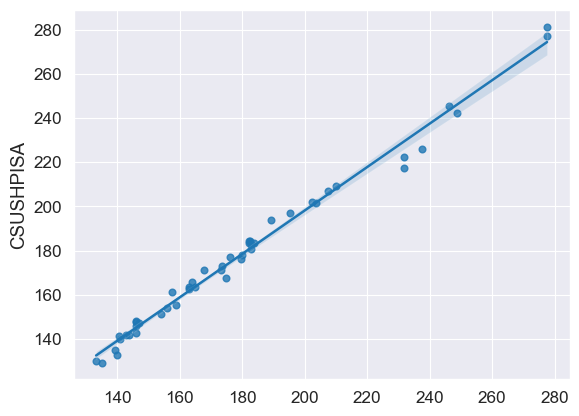

In [86]:
model(KNN())

R2 Score:  0.9604082972682689
R2 Score on training data:  0.9632684982904273
MAE:  5.818844037806501
MSE:  51.228865296458956
RMSE:  7.157434267700888
Mean of Cross_validation_scorec:  0.3416427753226641
Cross_validation_score:  [ 0.89784938  0.2086058   0.5979429   0.06124498 -0.05742918]


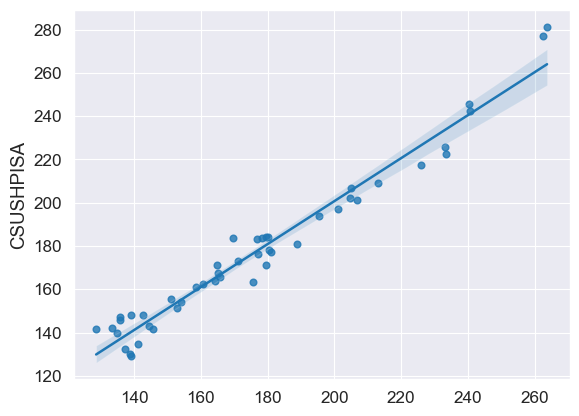

In [87]:
model(Lasso())

R2 Score:  0.9750721828855882
R2 Score on training data:  0.9801423513809189
MAE:  4.555615693524625
MSE:  32.25483363880401
RMSE:  5.67933390802161
Mean of Cross_validation_scorec:  0.4335739873849326
Cross_validation_score:  [ 0.63474129  0.27886586  0.63338009  0.82074434 -0.19986165]


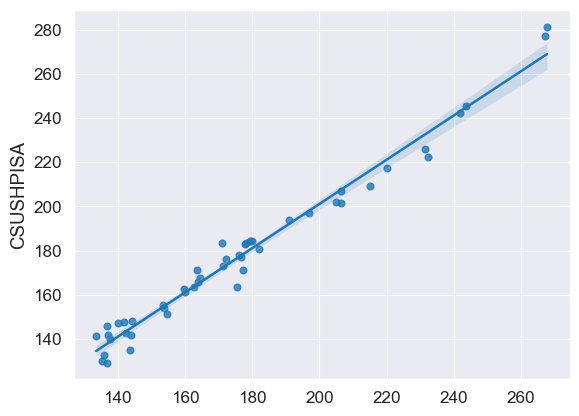

In [88]:
model(Ridge())

R2 Score:  0.4371930555966066
R2 Score on training data:  0.4357042268463802
MAE:  16.3120474358846
MSE:  728.2324111724936
RMSE:  26.985781648351296
Mean of Cross_validation_scorec:  -1.16828826454533
Cross_validation_score:  [-0.73361537  0.15749545 -1.43359638  0.51985346 -4.35157848]


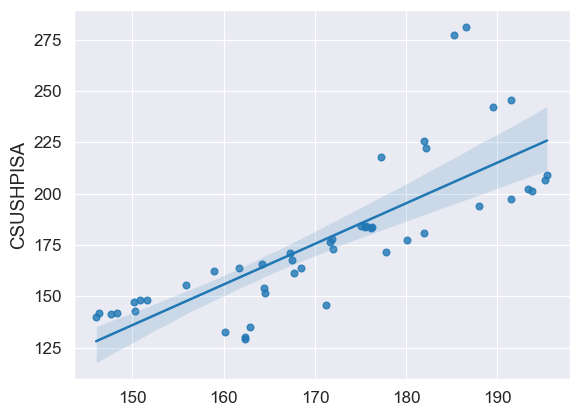

In [89]:
model(SVR())

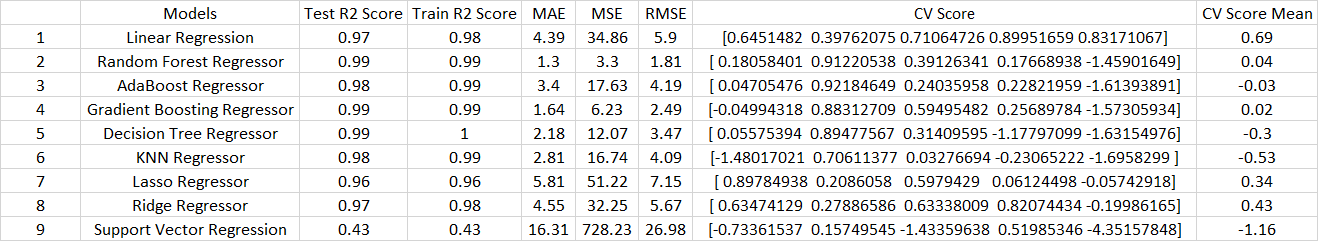

By observing, we can state that:

* Linear Regression:
    * Very High test R2 score(0.97) indicates model is fitting the data exceptionally well.
    * Very low MSE, MAE and RMSE score suggests the model's performance is very good.
    * Cross-validation score mean(0.69) is not too far off from test R2 score which indicates good model performance across all folds.

* Random Forest Regressor:
     *  Test R2 score is very high(0.99) demonstrating good model performance.
     *  MAE and MSE values are reasonable, suggesting that the model is making fairly accurate predictions.
     *  Cross-validation score mean(0.04) shows that model is overfitting.

* AdaBoostRegressor:
     * Similar to Random forest regressor, test values(R2 score) is very high and CV- mean score is very low. So this model is also overfitting.

* Gradient Boosting Regressor:
     * Similar to AdaBoost Regressor. So this model is also overfitting.

* Decision Tree Regressor:
     * The Decision Tree model seems to be overfitting, as indicated by a high R2 score(0.99)
     * High MAE and MSE values suggest that the model's predictions are not accurate.
     * CV mean score is -0.3. It suggest that the model is overfitting.

* K-Nearest Neighbors (KNN) Regressor:
     * Similar to Decision tree regressor. So the model is overfitting.

* Lasso and Ridge Regressors:
     * Both Lasso and Ridge Regressors have similar performance in terms of R2 scores.
     * High MAE and MSE values show that the models' predictions are not very accurate.
     * CV mean score of Ridge is slightly higher than lasso.

* Support Vector Regression (SVR):
     * R2 values are low(0.43) which indicates the model is not capturing the relationship well
     * Extremely high MAE, MSE, and RMSE values suggest that the model's predictions are far from the actual values.
     * Cross-validation scores are consistently low which indicates the model is overfitting.

After evaluation of the performance of all the models, we can say that the Linear Regression is the best performing model

Hyperparameter Tuning

In [90]:
parameters_lr = {
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'positive':[True,False]
}

In [91]:
gsv = GridSearchCV(LinearRegression(), parameters_lr, n_jobs=-1)
gsv.fit(x_train, y_train)
print(gsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'positive': False}


In [92]:
hyper_lr=LinearRegression(copy_X=True, fit_intercept=True, positive=False)

R2 Score:  0.973052844004914
R2 Score on training data:  0.9860960202128847
MAE:  4.394117610393539
MSE:  34.8677154389861
RMSE:  5.904889113182914
Mean of Cross_validation_scorec:  0.6969286940257884
Cross_validation_score:  [0.6451482  0.39762075 0.71064726 0.89951659 0.83171067]


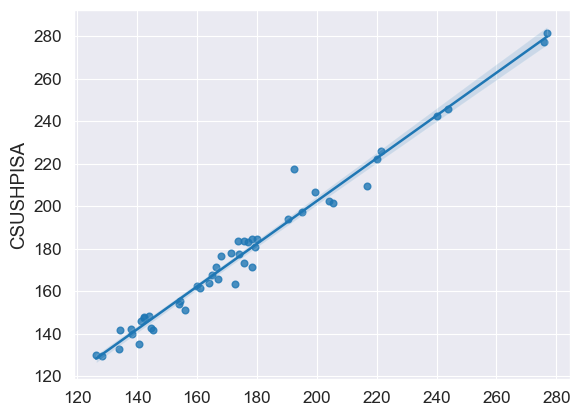

In [93]:
model(hyper_lr)

Linear Regression is the best performing model with R2 score(0.97) and CV mean score (0.69)

In [94]:
#Saving our model
import joblib
joblib.dump(hyper_lr, 'US Home Prices.pkl')

['US Home Prices.pkl']